In [1]:
import pandas as pd
import numpy as np

In [54]:
df=pd.read_csv('churn.csv')
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1065,0634-SZPQA,Female,0,No,No,23,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),90.05,2169.8,Yes
2669,4659-NZRUF,Female,0,No,No,19,Yes,Yes,Fiber optic,Yes,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,95.15,1789.25,Yes
6825,5022-KVDQT,Male,0,No,No,27,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.30,2272.8,No
5657,3096-GKWEB,Male,0,Yes,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.75,1691.9,No
2385,5156-UMKOW,Female,0,No,Yes,3,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,29.65,90.05,No
397,6599-CEBNN,Female,0,No,No,34,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),73.95,2524.45,Yes
4405,8417-FMLZI,Male,0,Yes,Yes,6,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),83.55,477.55,Yes
3885,4090-KPJIP,Female,0,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.95,212.4,No
5471,3002-WQZWT,Female,0,No,No,29,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.20,1993.25,No
323,7102-JJVTX,Female,0,Yes,Yes,9,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Mailed check,48.60,422.3,No


In [55]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]
inputs.iloc[488].TotalCharges

NameError: name 'inputs' is not defined

In [56]:
df[df.TotalCharges!=' '].shape

(7032, 21)

In [57]:
df = df[df['TotalCharges'] != ' ']
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [58]:
df.TotalCharges=pd.to_numeric(df.TotalCharges)
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [59]:
def print_unique_col_values(df):
    for columns in df:
        if df[columns].dtypes=='object':
            print(f'{columns}:{df[columns].unique()}')

In [60]:
print_unique_col_values(df)

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


Exploratory Data Analysis

In [61]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

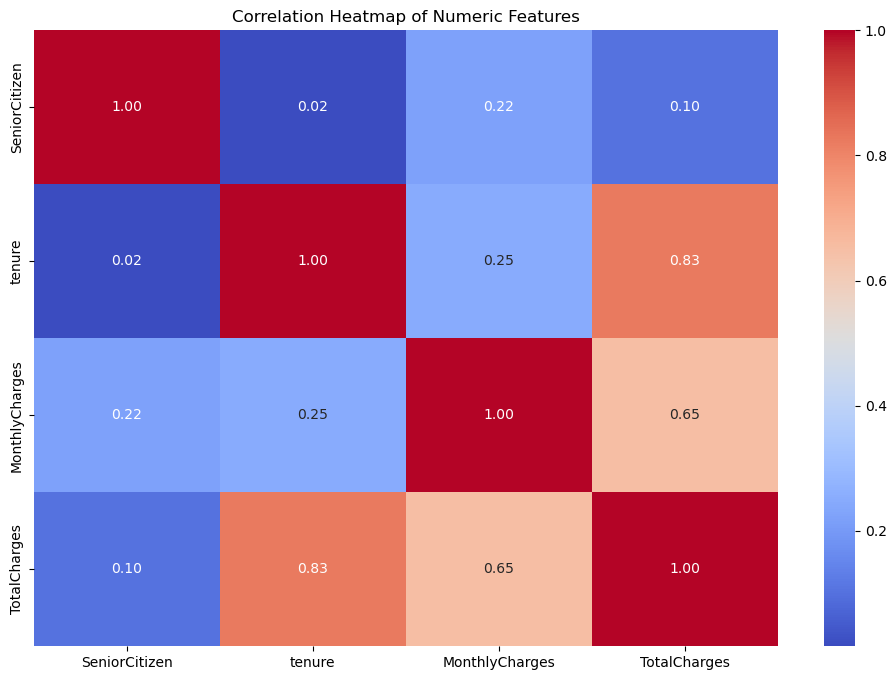

In [62]:
numeric_df = df.drop('customerID', axis=1).select_dtypes(include='number')

# Now plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

<Axes: xlabel='Churn', ylabel='count'>

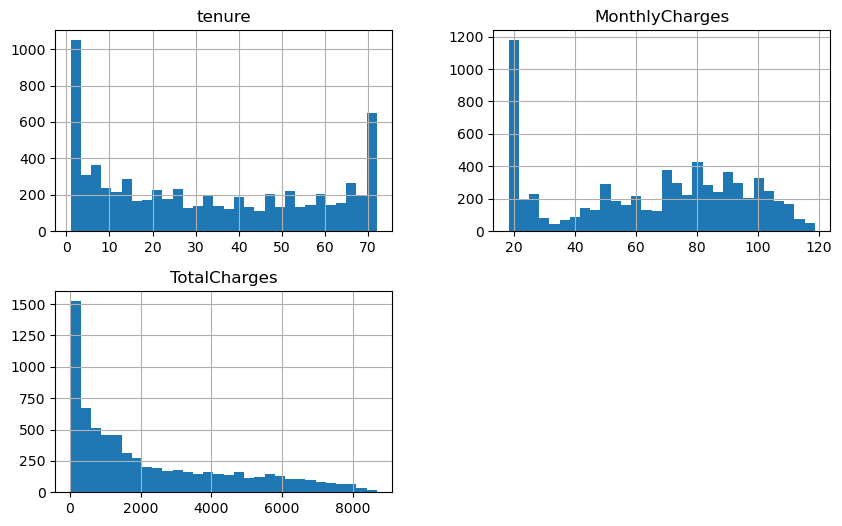

In [63]:
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical].hist(bins=30, figsize=(10, 6))
sns.countplot(x='Churn', data=df)

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

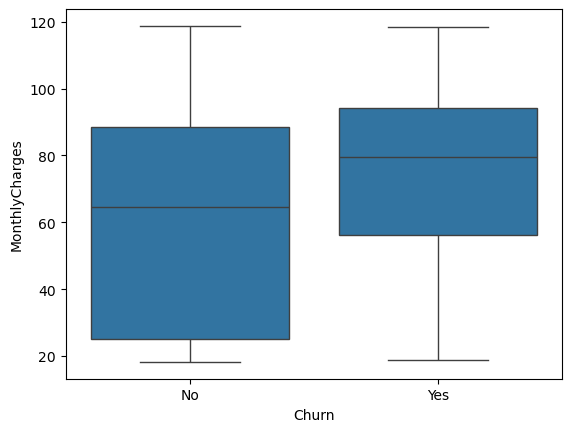

In [64]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

In [65]:
categorical = df.select_dtypes(include='object').columns.tolist()
categorical.remove('customerID')  # Not meaningful
for col in categorical:
    print(f"{col}:\n", df[col].value_counts(normalize=True), "\n")

gender:
 gender
Male      0.504693
Female    0.495307
Name: proportion, dtype: float64 

Partner:
 Partner
No     0.517491
Yes    0.482509
Name: proportion, dtype: float64 

Dependents:
 Dependents
No     0.701507
Yes    0.298493
Name: proportion, dtype: float64 

PhoneService:
 PhoneService
Yes    0.903299
No     0.096701
Name: proportion, dtype: float64 

MultipleLines:
 MultipleLines
No                  0.481371
Yes                 0.421928
No phone service    0.096701
Name: proportion, dtype: float64 

InternetService:
 InternetService
Fiber optic    0.440273
DSL            0.343572
No             0.216155
Name: proportion, dtype: float64 

OnlineSecurity:
 OnlineSecurity
No                     0.497298
Yes                    0.286547
No internet service    0.216155
Name: proportion, dtype: float64 

OnlineBackup:
 OnlineBackup
No                     0.438993
Yes                    0.344852
No internet service    0.216155
Name: proportion, dtype: float64 

DeviceProtection:
 Device

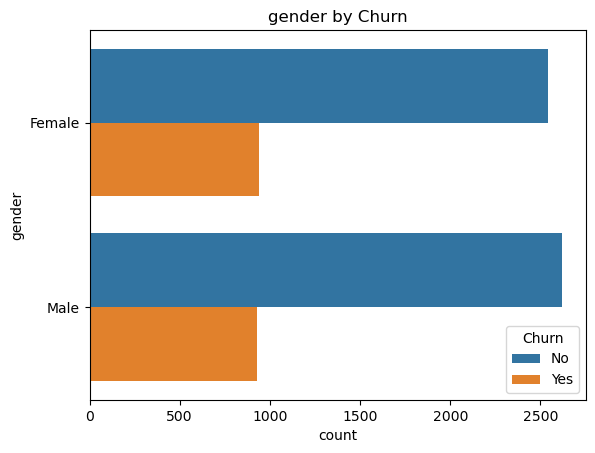

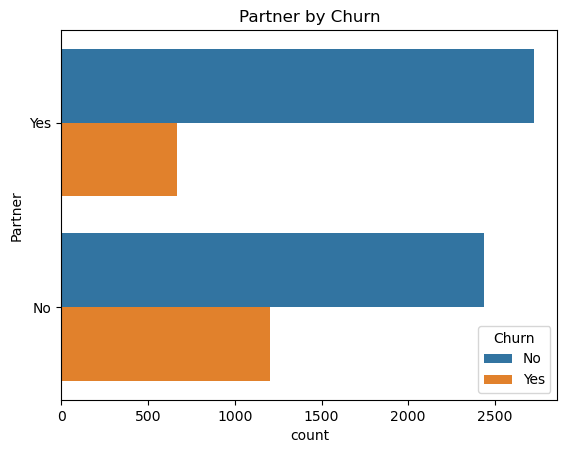

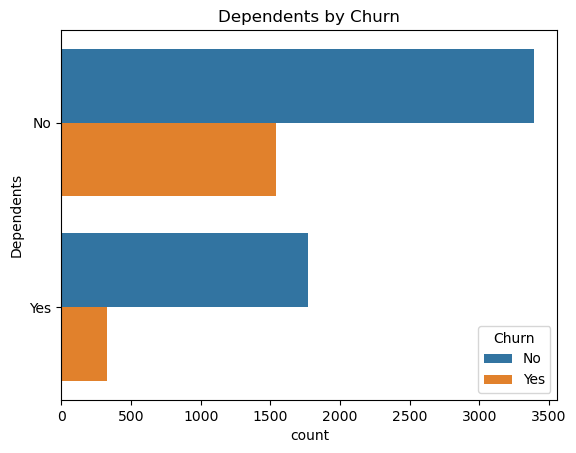

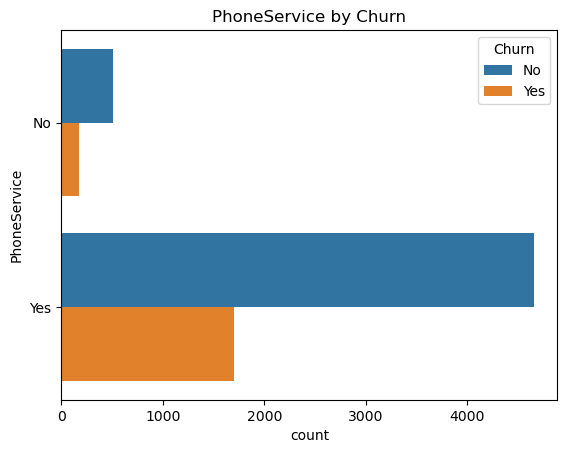

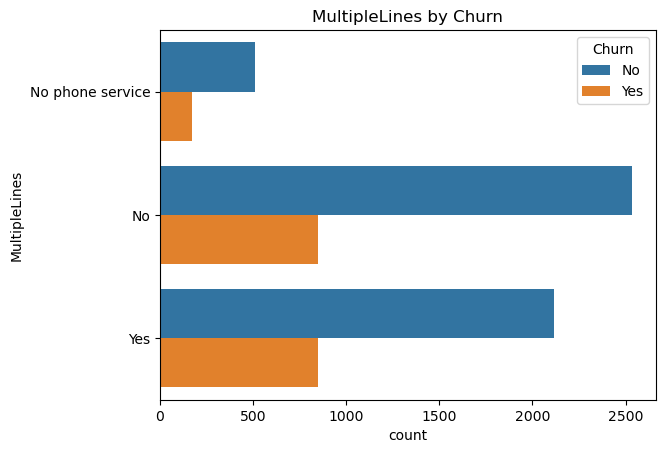

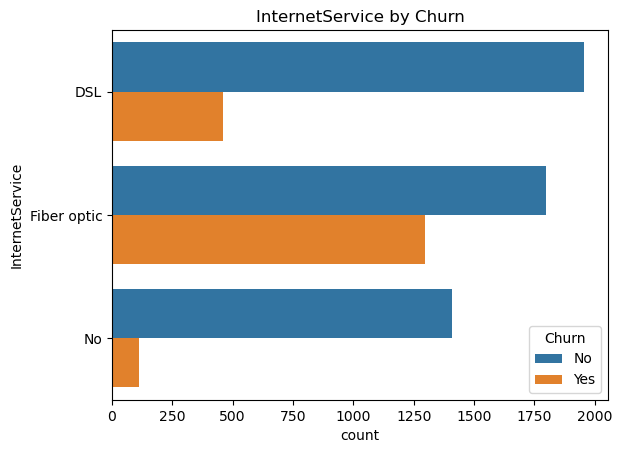

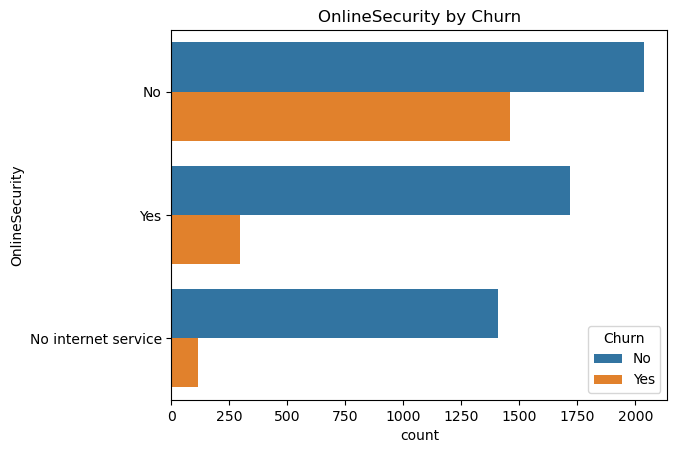

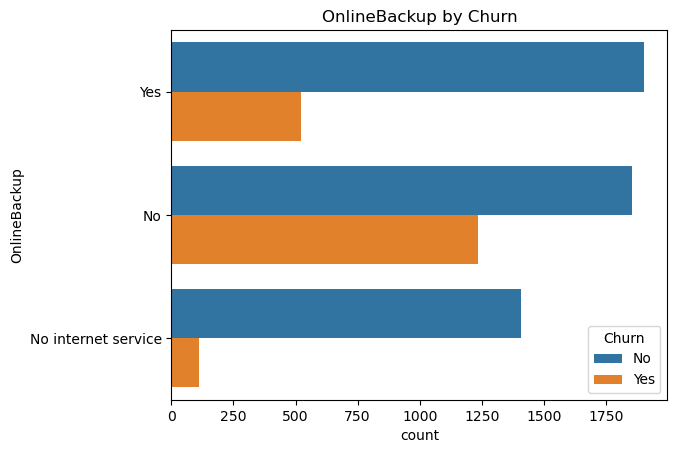

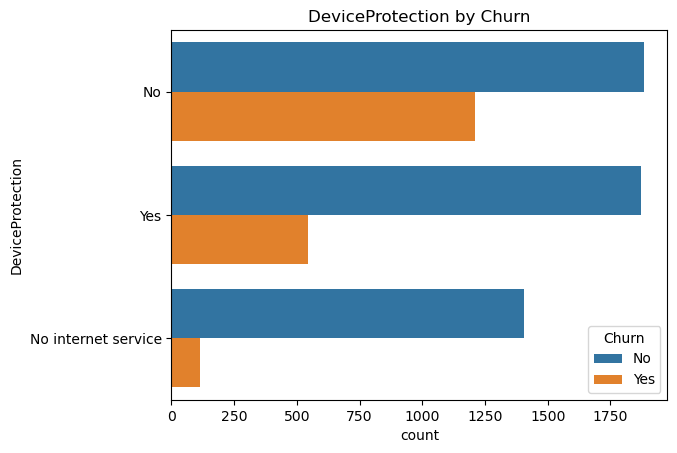

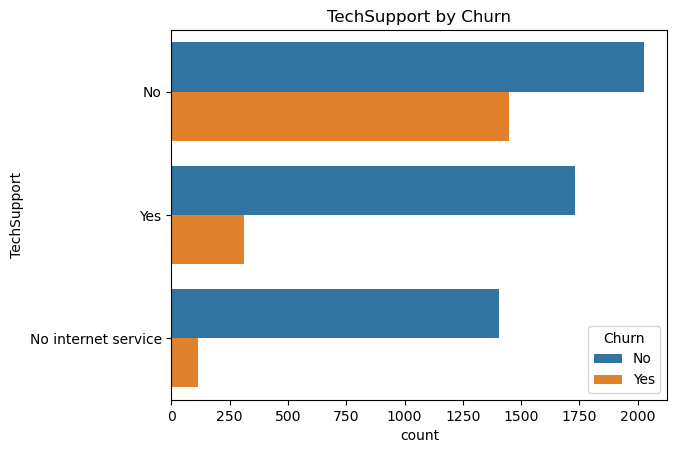

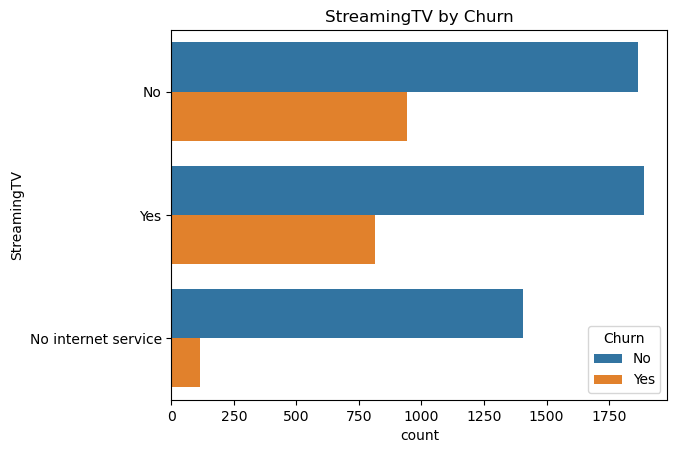

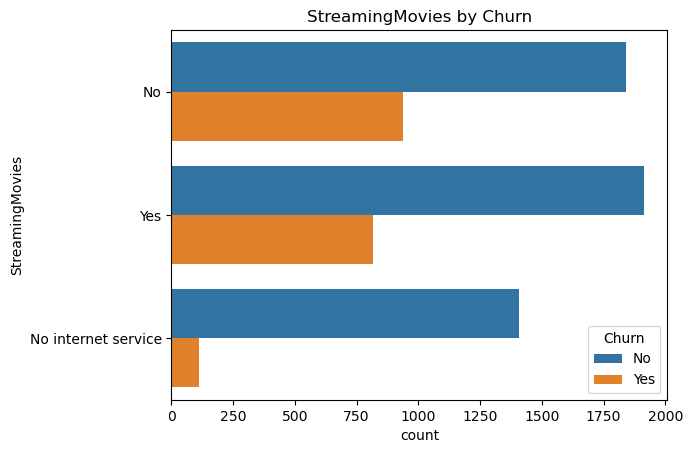

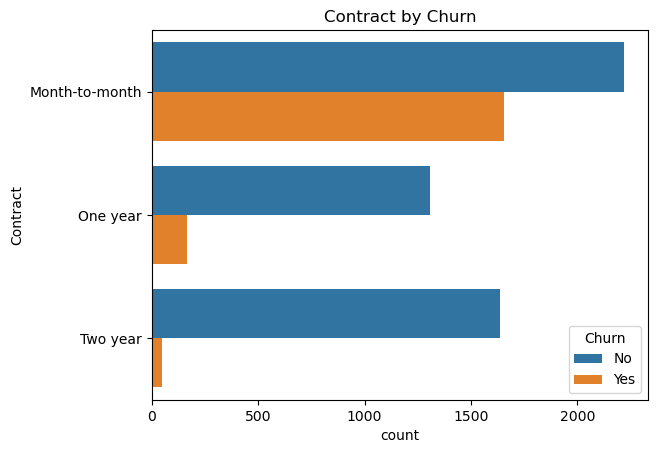

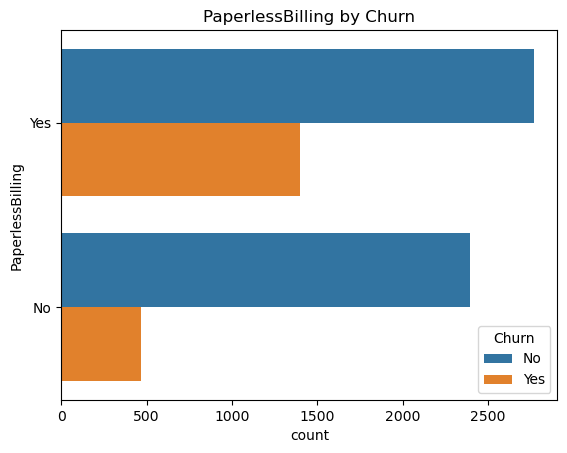

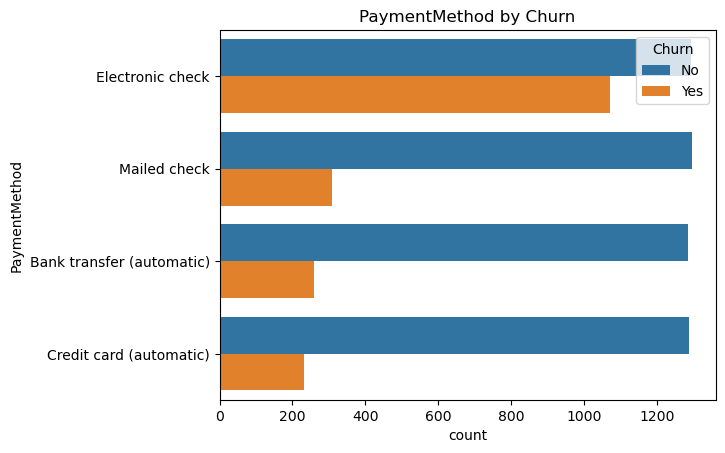

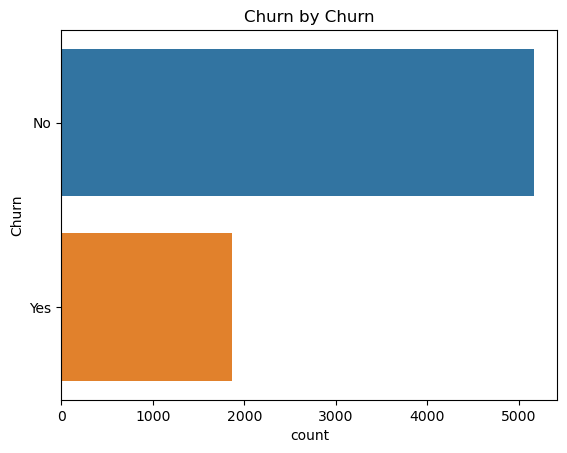

In [66]:
import matplotlib.pyplot as plt
for col in categorical:
    sns.countplot(y=col, data=df, hue='Churn')
    plt.title(f'{col} by Churn')
    plt.show()

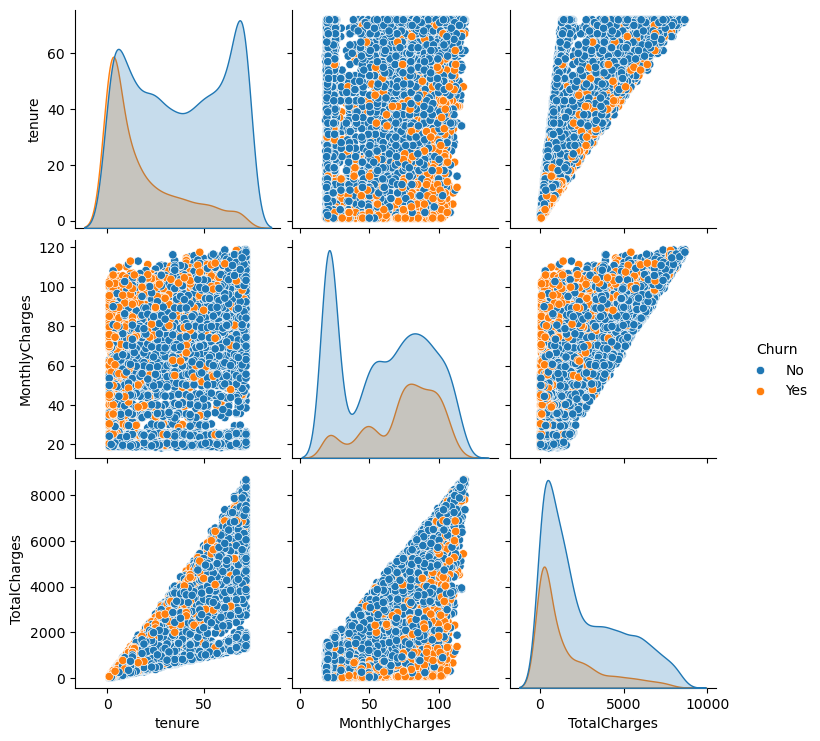

In [67]:
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')

In [68]:
df.drop(['customerID'], axis=1, inplace=True)

In [69]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [70]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

C:\Users\AKASH\AppData\Local\Temp\ipykernel_916\266577964.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [71]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('Churn')

In [72]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded.drop('Churn', axis=1))

In [74]:
df.replace('No internet service','No',inplace=True)
df.replace(['No phone service'],'No',inplace=True)

In [75]:
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, 72],
                            labels=['0-12', '13-24', '25-48', '49-60', '61-72'])

In [76]:
service_cols = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Convert 'No internet service' to 'No'
df[service_cols] = df[service_cols].replace({'No internet service': 'No'})
df['TotalServices'] = df[service_cols].apply(lambda x: x.eq('Yes').sum(), axis=1)

In [77]:
df['AvgMonthly'] = df['TotalCharges'] / (df['tenure'].replace(0, 1))

In [78]:
df['LongTermCustomer'] = ((df['tenure'] > 24) & (df['Contract'] == 'Two year')).astype(int)

In [79]:
df['AutoPay'] = df['PaymentMethod'].apply(lambda x: 1 if 'automatic' in x.lower() else 0)

In [80]:
corr_matrix = df_encoded.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = [column for column in upper.columns if any(upper[column] > 0.95)]
df_encoded.drop(columns=high_corr, inplace=True)

In [47]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,tenure_group,TotalServices,AvgMonthly,LongTermCustomer,AutoPay,InternetService_n,Contract_n,PaymentMethod_n
3738,1,0,0,0,35,0,0,0,0,1,...,49.20,1701.65,25-48,3,48.618571,0,0,0,0,2
3151,1,0,1,1,15,1,0,1,0,0,...,75.10,1151.55,13-24,2,76.770000,0,0,1,0,3
4860,1,0,1,1,13,0,0,1,1,0,...,40.55,590.35,13-24,3,45.411538,0,0,0,2,3
3867,0,0,1,0,26,1,0,0,1,1,...,73.50,1905.70,25-48,5,73.296154,1,1,0,2,1
3810,1,0,1,1,1,1,0,0,0,0,...,44.55,44.55,0-12,1,44.550000,0,0,0,0,2


In [81]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,TotalServices,AvgMonthly,LongTermCustomer,AutoPay
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,0,0-12,1,29.850000,0,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.50,0,25-48,3,55.573529,0,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Yes,Mailed check,53.85,108.15,1,0-12,3,54.075000,0,0
3,Male,0,No,No,45,No,No,DSL,Yes,No,...,No,Bank transfer (automatic),42.30,1840.75,0,25-48,3,40.905556,0,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,70.70,151.65,1,0-12,1,75.825000,0,0


In [50]:
df = df[df['TotalCharges'] != ' ']

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ValueError: could not convert string to float: '25-48'

In [32]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:gender: object, Partner: object, Dependents: object, PhoneService: object, MultipleLines: object, InternetService: object, OnlineSecurity: object, OnlineBackup: object, DeviceProtection: object, TechSupport: object, StreamingTV: object, StreamingMovies: object, Contract: object, PaperlessBilling: object, PaymentMethod: object, tenure_group: category

In [82]:
print_unique_col_values(df1)

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [83]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\AKASH\AppData\Local\Temp\ipykernel_916\1654967163.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({'Yes':1,'No':0},inplace=True)
C:\Users\AKASH\AppData\Local\Temp\ipykernel_916\1654967163.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].replace({'Yes':1,'No':0

In [84]:
df.dtypes

gender                object
SeniorCitizen          int64
Partner                int64
Dependents             int64
tenure                 int64
PhoneService           int64
MultipleLines          int64
InternetService       object
OnlineSecurity         int64
OnlineBackup           int64
DeviceProtection       int64
TechSupport            int64
StreamingTV            int64
StreamingMovies        int64
Contract              object
PaperlessBilling       int64
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                  int64
tenure_group        category
TotalServices          int64
AvgMonthly           float64
LongTermCustomer       int32
AutoPay                int64
dtype: object

In [85]:
df['gender'].replace({'Male':1,'Female':0},inplace=True)
df.dtypes

C:\Users\AKASH\AppData\Local\Temp\ipykernel_916\2269106537.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'Male':1,'Female':0},inplace=True)
C:\Users\AKASH\AppData\Local\Temp\ipykernel_916\2269106537.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].replace(

gender                 int64
SeniorCitizen          int64
Partner                int64
Dependents             int64
tenure                 int64
PhoneService           int64
MultipleLines          int64
InternetService       object
OnlineSecurity         int64
OnlineBackup           int64
DeviceProtection       int64
TechSupport            int64
StreamingTV            int64
StreamingMovies        int64
Contract              object
PaperlessBilling       int64
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                  int64
tenure_group        category
TotalServices          int64
AvgMonthly           float64
LongTermCustomer       int32
AutoPay                int64
dtype: object

In [12]:
df1.drop('customerID',axis='columns',inplace=True)

C:\Users\AKASH\AppData\Local\Temp\ipykernel_22360\2082743622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('customerID',axis='columns',inplace=True)


In [86]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,TotalServices,AvgMonthly,LongTermCustomer,AutoPay
0,0,0,1,0,1,0,0,DSL,0,1,...,1,Electronic check,29.85,29.85,0,0-12,1,29.850000,0,0
1,1,0,0,0,34,1,0,DSL,1,0,...,0,Mailed check,56.95,1889.50,0,25-48,3,55.573529,0,0
2,1,0,0,0,2,1,0,DSL,1,1,...,1,Mailed check,53.85,108.15,1,0-12,3,54.075000,0,0
3,1,0,0,0,45,0,0,DSL,1,0,...,0,Bank transfer (automatic),42.30,1840.75,0,25-48,3,40.905556,0,1
4,0,0,0,0,2,1,0,Fiber optic,0,0,...,1,Electronic check,70.70,151.65,1,0-12,1,75.825000,0,0


In [87]:
from sklearn.preprocessing import LabelEncoder
le_InternetService=LabelEncoder()
le_Contract=LabelEncoder()
le_PaymentMethod=LabelEncoder()
df['InternetService_n']=le_InternetService.fit_transform(df['InternetService'])
df['Contract_n']=le_Contract.fit_transform(df['Contract'])
df['PaymentMethod_n']=le_PaymentMethod.fit_transform(df['PaymentMethod'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TotalCharges,Churn,tenure_group,TotalServices,AvgMonthly,LongTermCustomer,AutoPay,InternetService_n,Contract_n,PaymentMethod_n
0,0,0,1,0,1,0,0,DSL,0,1,...,29.85,0,0-12,1,29.850000,0,0,0,0,2
1,1,0,0,0,34,1,0,DSL,1,0,...,1889.50,0,25-48,3,55.573529,0,0,0,1,3
2,1,0,0,0,2,1,0,DSL,1,1,...,108.15,1,0-12,3,54.075000,0,0,0,0,3
3,1,0,0,0,45,0,0,DSL,1,0,...,1840.75,0,25-48,3,40.905556,0,1,0,1,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,...,151.65,1,0-12,1,75.825000,0,0,1,0,2


In [88]:
df.drop(['InternetService','Contract','PaymentMethod'],axis='columns',inplace=True)


In [89]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges,Churn,tenure_group,TotalServices,AvgMonthly,LongTermCustomer,AutoPay,InternetService_n,Contract_n,PaymentMethod_n
0,0,0,1,0,1,0,0,0,1,0,...,29.85,0,0-12,1,29.850000,0,0,0,0,2
1,1,0,0,0,34,1,0,1,0,1,...,1889.50,0,25-48,3,55.573529,0,0,0,1,3
2,1,0,0,0,2,1,0,1,1,0,...,108.15,1,0-12,3,54.075000,0,0,0,0,3
3,1,0,0,0,45,0,0,1,0,1,...,1840.75,0,25-48,3,40.905556,0,1,0,1,0
4,0,0,0,0,2,1,0,0,0,0,...,151.65,1,0-12,1,75.825000,0,0,1,0,2


In [90]:
df.dtypes

gender                  int64
SeniorCitizen           int64
Partner                 int64
Dependents              int64
tenure                  int64
PhoneService            int64
MultipleLines           int64
OnlineSecurity          int64
OnlineBackup            int64
DeviceProtection        int64
TechSupport             int64
StreamingTV             int64
StreamingMovies         int64
PaperlessBilling        int64
MonthlyCharges        float64
TotalCharges          float64
Churn                   int64
tenure_group         category
TotalServices           int64
AvgMonthly            float64
LongTermCustomer        int32
AutoPay                 int64
InternetService_n       int32
Contract_n              int32
PaymentMethod_n         int32
dtype: object

In [91]:
df.tenure_group

0        0-12
1       25-48
2        0-12
3       25-48
4        0-12
        ...  
7038    13-24
7039    61-72
7040     0-12
7041     0-12
7042    61-72
Name: tenure_group, Length: 7032, dtype: category
Categories (5, object): ['0-12' < '13-24' < '25-48' < '49-60' < '61-72']

In [104]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [94]:
cat_cols = df.select_dtypes(include='category').columns.tolist()
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [98]:
df = df.drop(columns=[col for col in df.columns if col.startswith('tenure_group_')])

In [105]:
X_train.dtypes

gender                 int64
SeniorCitizen          int64
Partner                int64
Dependents             int64
tenure                 int64
PhoneService           int64
MultipleLines          int64
OnlineSecurity         int64
OnlineBackup           int64
DeviceProtection       int64
TechSupport            int64
StreamingTV            int64
StreamingMovies        int64
PaperlessBilling       int64
MonthlyCharges       float64
TotalCharges         float64
TotalServices          int64
AvgMonthly           float64
LongTermCustomer       int32
AutoPay                int64
InternetService_n      int32
Contract_n             int32
PaymentMethod_n        int32
dtype: object

In [106]:
from xgboost import XGBClassifier

model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1])  # handle class imbalance
)

model.fit(X_train, y_train)

C:\Users\AKASH\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py:158: UserWarning: [21:22:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [108]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [109]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7434257285003554
F1 Score: 0.5707491082045184
ROC-AUC: 0.8021895108479016

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.78      0.82      1033
           1       0.51      0.64      0.57       374

    accuracy                           0.74      1407
   macro avg       0.69      0.71      0.69      1407
weighted avg       0.77      0.74      0.75      1407



<Figure size 1000x600 with 0 Axes>

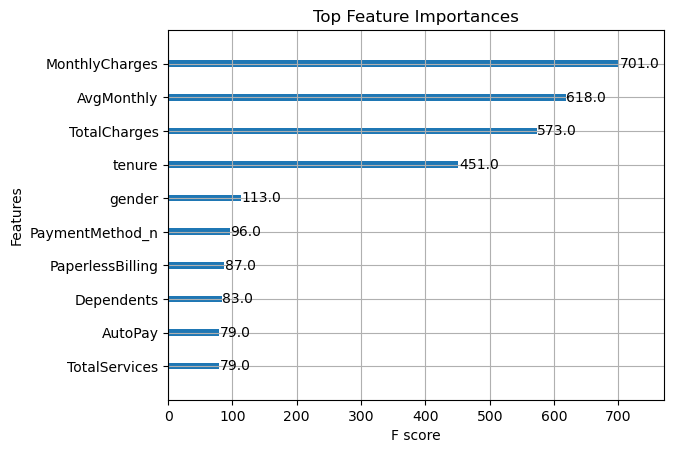

In [110]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(10, 6))
plot_importance(model, max_num_features=10)
plt.title("Top Feature Importances")
plt.show()

In [112]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1033
           1       0.51      0.64      0.57       374

    accuracy                           0.74      1407
   macro avg       0.69      0.71      0.69      1407
weighted avg       0.77      0.74      0.75      1407

[[806 227]
 [134 240]]


In [113]:
print(confusion_matrix(y_test, y_pred))

[[806 227]
 [134 240]]


In [122]:
import numpy as np
from sklearn.metrics import f1_score, roc_auc_score

y_proba = model.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.1, 0.9, 0.05)
for t in thresholds:
    preds = (y_proba >= t).astype(int)
    print(f"Threshold: {t:.2f} | F1: {f1_score(y_test, preds):.4f} | AUC: {roc_auc_score(y_test, y_proba):.4f}")

Threshold: 0.10 | F1: 0.5506 | AUC: 0.8022
Threshold: 0.15 | F1: 0.5604 | AUC: 0.8022
Threshold: 0.20 | F1: 0.5643 | AUC: 0.8022
Threshold: 0.25 | F1: 0.5714 | AUC: 0.8022
Threshold: 0.30 | F1: 0.5801 | AUC: 0.8022
Threshold: 0.35 | F1: 0.5875 | AUC: 0.8022
Threshold: 0.40 | F1: 0.5910 | AUC: 0.8022
Threshold: 0.45 | F1: 0.5815 | AUC: 0.8022
Threshold: 0.50 | F1: 0.5707 | AUC: 0.8022
Threshold: 0.55 | F1: 0.5571 | AUC: 0.8022
Threshold: 0.60 | F1: 0.5469 | AUC: 0.8022
Threshold: 0.65 | F1: 0.5396 | AUC: 0.8022
Threshold: 0.70 | F1: 0.5214 | AUC: 0.8022
Threshold: 0.75 | F1: 0.5008 | AUC: 0.8022
Threshold: 0.80 | F1: 0.4712 | AUC: 0.8022
Threshold: 0.85 | F1: 0.4396 | AUC: 0.8022


In [115]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

params = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'scale_pos_weight': [2.7]  # from imbalance ratio
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

rsearch = RandomizedSearchCV(
    xgb,
    param_distributions=params,
    n_iter=25,
    scoring='f1',
    n_jobs=-1,
    cv=3,
    verbose=1
)

rsearch.fit(X_train, y_train)
print("Best Params:", rsearch.best_params_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best Params: {'subsample': 0.8, 'scale_pos_weight': 2.7, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.6}


C:\Users\AKASH\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py:158: UserWarning: [21:30:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [118]:
!pip install imblearn


   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 2/2 [imblearn]




[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [119]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

xgb.fit(X_res, y_res)

C:\Users\AKASH\anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py:158: UserWarning: [21:31:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [120]:
y_pred_final = (y_proba >= 0.40).astype(int)

In [121]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))

[[768 265]
 [106 268]]
              precision    recall  f1-score   support

           0       0.88      0.74      0.81      1033
           1       0.50      0.72      0.59       374

    accuracy                           0.74      1407
   macro avg       0.69      0.73      0.70      1407
weighted avg       0.78      0.74      0.75      1407



C:\Users\AKASH\anaconda3\envs\tensorflow\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


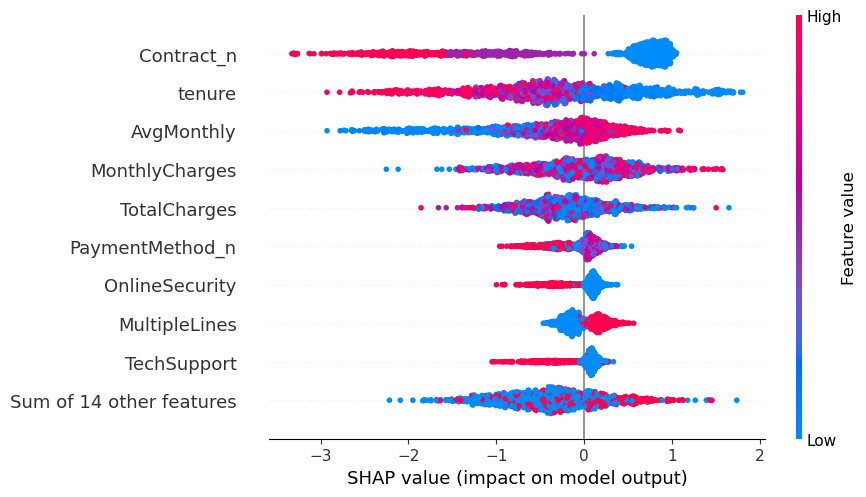

In [123]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

shap.plots.beeswarm(shap_values)